In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df =pd.read_csv("spam.tsv",sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
ham=df[df['label']=='ham']
spam =df[df['label']=='spam']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
ham =ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [13]:
data = ham.append(spam,ignore_index =True)
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_14272\4002795139.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam,ignore_index =True)


,label,message,length,punct
0,ham,Oh... Haha... Den we shld had went today too.....,134,20
1,ham,"Good evening Sir, hope you are having a nice d...",482,15
2,ham,There bold 2 &lt;#&gt; . Is that yours,39,6
3,ham,Are you available for soiree on June 3rd?,41,1
4,ham,Webpage s not available!,24,1


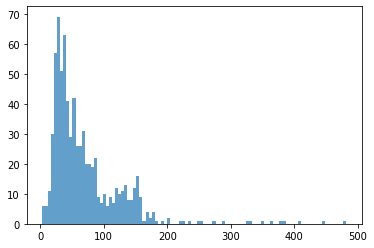

In [16]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.show()

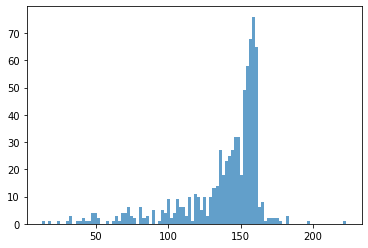

In [17]:
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
x_train,x_test,y_train,y_test= train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])
x_train


1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742            I know you are. Can you pls open the back?
477     Then ü ask dad to pick ü up lar... Ü wan 2 sta...
542                   You call him now ok i said call him
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     Ask g or iouri, I've told the story like ten t...
268                   Its normally hot mail. Com you see!
272     Can you tell Shola to please go to college of ...
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [ ]:
vectorizer =TfidfVectorizer()
x_train =vectorizer.fit_transform(x_train)
x_train

In [34]:
clf =Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [35]:
y_pred=clf.predict(x_test)
confusion_matrix(y_test,y_pred)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         ham       0.90      1.00      0.94       225\n        spam       0.99      0.88      0.94       224\n\n    accuracy                           0.94       449\n   macro avg       0.95      0.94      0.94       449\nweighted avg       0.95      0.94      0.94       449\n'

In [36]:
print(accuracy_score(y_test,y_pred))

0.9398663697104677


In [37]:
clf.predict(["hi im gopala krishnan"])

array(['ham'], dtype=object)

In [44]:
clf.predict(["congratulations!, you have won  free tickets to USA this summer"])

array(['spam'], dtype=object)

In [46]:
import joblib
joblib.dump(clf,"spam_prediction.joblib")

['spam_prediction.joblib']